# Adult Census Income Analysis and Model

This dataset contains information extracted from the 1994 Census bureau database, which I acquired from a [dataset](https://www.kaggle.com/uciml/adult-census-income) on Kaggle.

## Problem Understanding
For this project, we will analyze the dataset to determine the demographics of the induviduals included in the data. The ultimate goal will be to create a model to accurately predict whether an induvidual makes more or less than $50,000 based on their characteristics.

Project Outline:
1. Analyze demographics including gender, race, age, education, marital status, and income.
2. Prepare the dataset for modeling.
3. Model data using Decision Tress and Random Forest.

## Acquiring Initial Libraries and Data

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('adult.csv')

# Exploratory Data Analysis

In [8]:
print(df.shape)

(32561, 15)


In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [157]:
# Check to see if there are null values in the data
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Gender

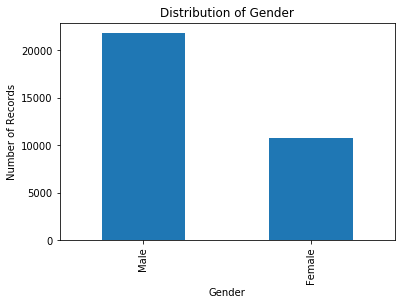

In [158]:
# Create a bar chart to display number of each gender in dataset
df['sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Records')

plt.show()

## Race

In [159]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

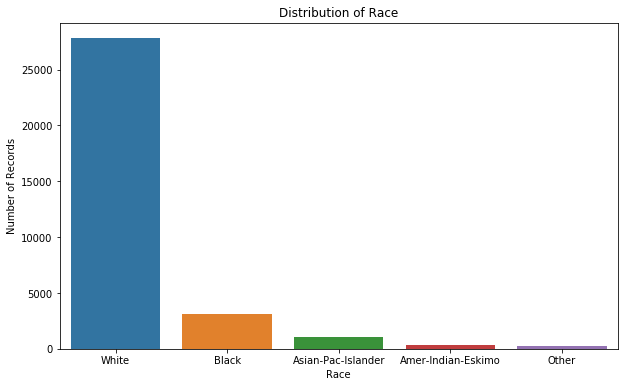

In [154]:
# Create a bar chart to show distribution of race
by_race = df['race'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=by_race.index, y=by_race.values)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Number of Records')

plt.show()

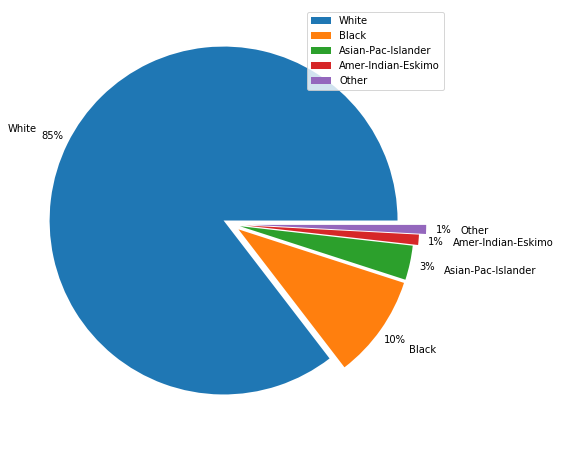

In [163]:
plt.figure(figsize=(10,8), facecolor='white')

plt.pie(x=by_race.values,
        labels=by_race.index,
        explode=(0.05, 0.05, 0.05, 0.08, 0.12),
        autopct='%1.0f%%',
        labeldistance=1.2,
        pctdistance=1.1)

plt.legend(loc='upper right')
plt.show()

## Marital Status

In [161]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

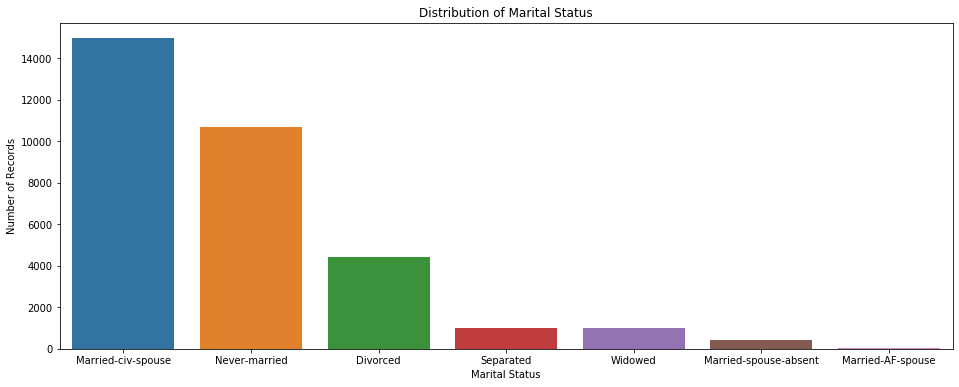

In [153]:
# Create series with marital statuses and corresponding values
by_marital_status = df['marital.status'].value_counts()

# Create bar plot of marital statuses
plt.figure(figsize=(16,6))
sns.barplot(x=by_marital_status.index, y=by_marital_status.values)
plt.title('Distribution of Marital Status')
plt.ylabel('Number of Records')
plt.xlabel('Marital Status')

plt.show()

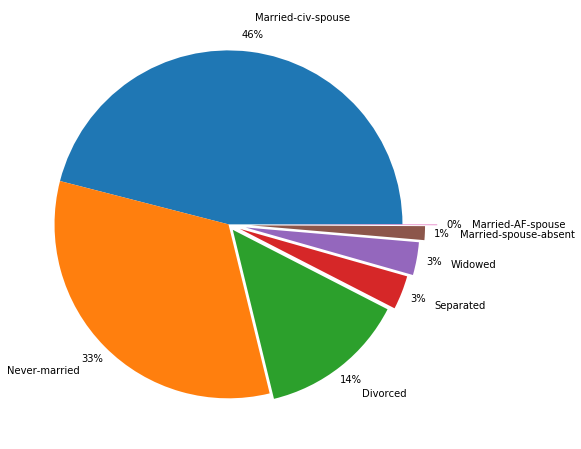

In [151]:
plt.figure(figsize=(12,8), facecolor='white')

plt.pie(x=by_marital_status.values,
        labels=by_marital_status.index,
        explode=(0.0, 0.0, 0.04, 0.07, 0.1, 0.13, 0.2),
        autopct='%1.0f%%',
        labeldistance=1.2,
        pctdistance=1.1)

plt.show()

## Age

In [162]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Text(0, 0.5, 'Frequency')

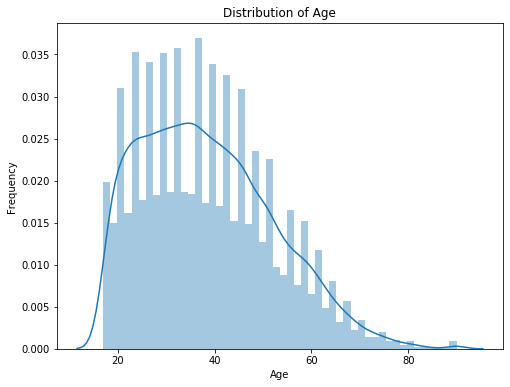

In [166]:
# Create a histogram based on age
plt.figure(figsize=(8,6))
sns.distplot(a=df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [216]:
# Define a function to bin the age category
def age_bin(age):
    if age >= 60:
        return '60 +'
    elif age >= 50:
        return '50 to 59'
    elif age >= 40:
        return '40 to 49'
    elif age >= 30:
        return '30 to 39'
    elif age >= 20:
        return '20 to 29'
    else:
        return '20 >'

# Apply the function to the dataframe
df['age_binned'] = df['age'].apply(age_bin)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_binned
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,60 +
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,60 +
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,60 +
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,50 to 59
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,40 to 49


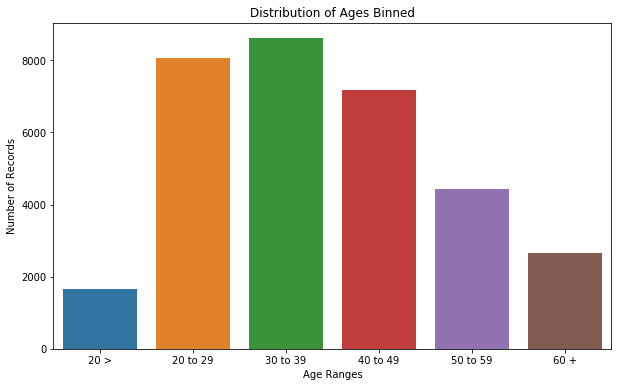

In [217]:
by_age_binned = df.groupby('age_binned')['age_binned'].count()

plt.figure(figsize=(10,6))
sns.barplot(x=by_age_binned.index, y=by_age_binned.values)
plt.title('Distribution of Ages Binned')
plt.ylabel('Number of Records')
plt.xlabel('Age Ranges')

plt.show()

In [218]:
x = df.groupby(['age_binned', 'income'])[['age_binned']].count()
x

age_binned
age_binned income            
20 >       <=50K         1655
           >50K             2
20 to 29   <=50K         7545
           >50K           509
30 to 39   <=50K         6304
           >50K          2309
40 to 49   <=50K         4513
           >50K          2662
50 to 59   <=50K         2711
           >50K          1707
60 +       <=50K         1992
           >50K           652

In [210]:
pd.crosstab(df['income'], df['age_binned'])

age_binned,20 >,20 to 29,30 to 39,40 to 49,50 to 59,60 +
income,,,,,,
<=50K,1655,7545,6304,4513,2711,1992
>50K,2,509,2309,2662,1707,652


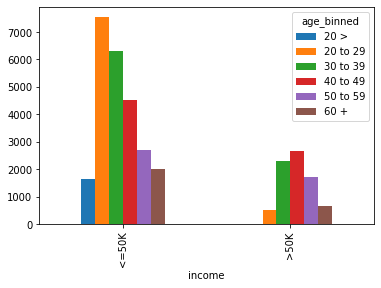

In [212]:
x = pd.crosstab(df['income'], df['age_binned'])
x.plot(kind='bar')